# Data analysis MZI

We analyze the following MZI samples from the edx course

MZI1:
dL_wg=0

MZI2:
r=5
dL_path = (208.40000 - 148.15000) * 2
dL_wg = dL_path + 2*pi*r - 4*2*r
= 111.915

MZI3:
r=5
dL_path = (259.55000-148.15000) * 2
dL_wg = dL_path + 2*pi*r - 4*2*r ; dL_wg
= 214.215

MZI4:
r1 = 435.90000-427.60000; r1
r2 = 10
dL_path = (259.55000-148.15000) * 2
dL_wg = dL_path + pi*(r1+r2) - 4*(r1+r2) ; dL_wg
= 207.08945

MZI5:
r1 = 556.35000-547.60000; r1
r2 = 10
dL_path = (259.55000-148.15000) * 2
dL_wg = dL_path + pi*(r1+r2) - 4*(r1+r2) ; dL_wg
= 206.703125

MZI6:
r=4
dL_path = (259.55000-148.15000) * 2
dL_wg = dL_path + 2*pi*r - 4*2*r ; dL_wg
= 215.932

MZI8:
r=3
dL_path = (259.55000-148.15000) * 2
dL_wg = dL_path + 2*pi*r - 4*2*r ; dL_wg
= 217.649

MZI17:
r=2
dL_path = (259.55000-148.15000) * 2
dL_wg = dL_path + 2*pi*r - 4*2*r ; dL_wg
= 219.366

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ubcpdk
import ubcpdk.simulation.circuits_simphony as cm
from ubcpdk.simulation.circuits.mzi_spectrum import mzi_spectrum

2022-06-22 20:38:43.518 | INFO     | gdsfactory.config:<module>:52 - Load '/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/gdsfactory' 5.10.15


2022-06-22 20:38:45.464 | INFO     | ubcpdk:<module>:36 - Found UBCpdk '1.6.4' installed at PosixPath('/home/runner/work/ubc/ubc/ubcpdk')


2022-06-22 20:38:45.723725: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-22 20:38:45.723778: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2022-06-22 20:38:47.767647: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-22 20:38:47.767688: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-22 20:38:47.767714: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fv-az196-685): /proc/driver/nvidia/version does not exist
2022-06-22 20:38:47.768076: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


INFO:tensorflow:Restoring parameters from /usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/SiPANN/ANN/TIGHT_ANGLE_GAP/model


2022-06-22 20:38:48.009812: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


INFO:tensorflow:Restoring parameters from /usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/SiPANN/ANN/TIGHT_ANGLE_STRAIGHT/model


INFO:tensorflow:Restoring parameters from /usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/SiPANN/ANN/TIGHT_ANGLE_BENT_RAND/model


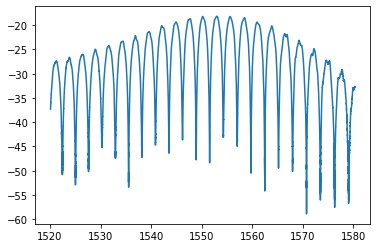

In [2]:
w, p = ubcpdk.data.read_mat(ubcpdk.PATH.mzi1, port=0)
plt.plot(w, p)

For some reason this MZI has an interference pattern. This is strange because the lengths of both arms are the same. This means that there was a strong height variation on the chip.

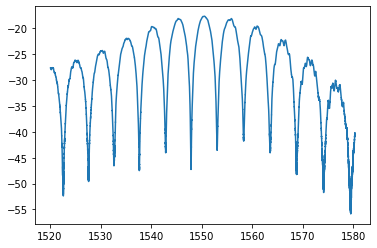

In [3]:
w, p = ubcpdk.data.read_mat(ubcpdk.PATH.mzi3, port=0)
plt.plot(w, p)

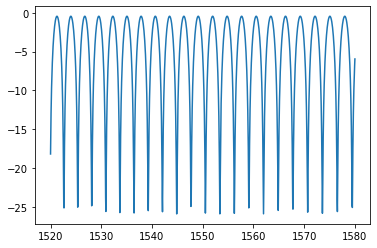

In [4]:
wr = np.linspace(1520, 1580, 1200) * 1e-3
pr = mzi_spectrum(L1_um=0, L2_um=214.215, wavelength_um=wr)
plt.plot(wr * 1e3, 10 * np.log10(pr))

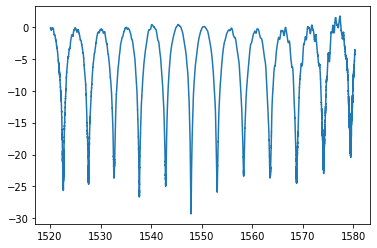

In [5]:
w, p = ubcpdk.data.read_mat(ubcpdk.PATH.mzi3, port=0)
pb = ubcpdk.data.remove_baseline(w, p)
plt.plot(w, pb)

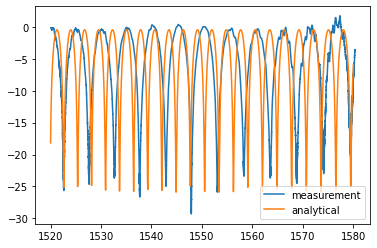

In [6]:
plt.plot(w, pb, label="measurement")
plt.plot(wr * 1e3, 10 * np.log10(pr), label="analytical")
plt.legend()

In [7]:
ms.sweep_wavelength?

Object `ms.sweep_wavelength` not found.


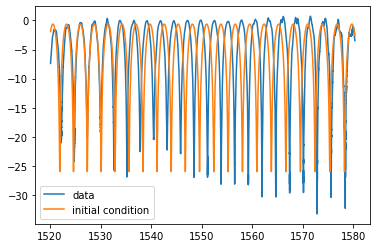

In [8]:
from scipy.optimize import curve_fit

L1_um = 40
L2_um = L1_um + 215.932


def mzi_logscale(wavelength_um, alpha, n1, n2, n3):
    return 10 * np.log10(
        mzi_spectrum(
            L1_um=L1_um,
            L2_um=L2_um,
            wavelength_um=wavelength_um,
            alpha=alpha,
            n1=n1,
            n2=n2,
            n3=n3,
        )
    )


w, p = ubcpdk.data.read_mat(ubcpdk.PATH.mzi6, port=0)
wum = w * 1e-3
pb = ubcpdk.data.remove_baseline(w, p)

p0 = [1e-3, 2.4, -1, 0]
plt.plot(w, pb, label="data")
plt.plot(w, mzi_logscale(wum, *p0), label="initial condition")
plt.legend()

In [9]:
params, params_covariance = curve_fit(mzi_logscale, wum, pb, p0=[1e-3, 2.4, -1, 0])

In [10]:
params

array([ 0.00555726,  2.39711747, -1.01841085,  4.99322256])

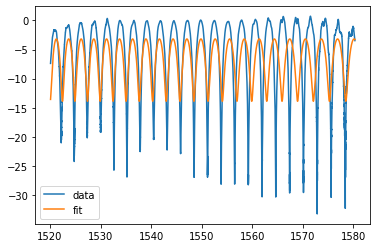

In [11]:
plt.plot(w, pb, label="data")
plt.plot(w, mzi_logscale(wum, *params), label="fit")
plt.legend()

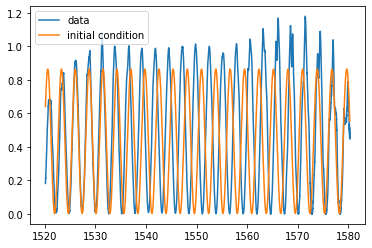

In [12]:
L1_um = 40
L2_um = L1_um + 215.932


def mzi(wavelength_um, alpha, n1, n2, n3):
    return mzi_spectrum(
        L1_um=L1_um,
        L2_um=L2_um,
        wavelength_um=wavelength_um,
        alpha=alpha,
        n1=n1,
        n2=n2,
        n3=n3,
    )


w, p = ubcpdk.data.read_mat(ubcpdk.PATH.mzi6, port=0)
wum = w * 1e-3
pb = ubcpdk.data.remove_baseline(w, p)
pb_linear = 10 ** (pb / 10)

p0 = [1e-3, 2.4, -1, 0]
plt.plot(w, pb_linear, label="data")
plt.plot(w, mzi(wum, *p0), label="initial condition")
plt.legend()

In [13]:
params, params_covariance = curve_fit(mzi, wum, pb, p0=p0)

/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


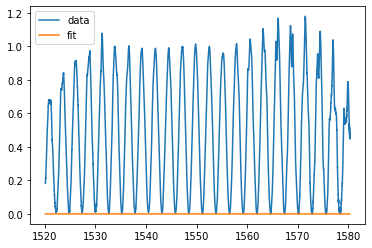

In [14]:
plt.plot(w, pb_linear, label="data")
plt.plot(w, mzi(wum, *params), label="fit")
plt.legend()